In [2]:
import string
import requests
import json
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
ps = PorterStemmer()


# USING SCRAPPED NEWS FROM THE BBC SITE

### Scraping Sport News

In [3]:
sport_url = "https://www.bbc.com/sport/"
soup = BeautifulSoup(requests.get(sport_url).text, "html.parser")


In [4]:
#sub-categories to be entered in  the request
sports =  ['football', 'cricket', 'formula1', 'rugby-union', 'rugby-league', 'tennis', 'golf', 'boxing', 'athletics']

In [5]:
# tags needed to extract sports data
stories_class = "gel-layout gel-layout--equal gs-u-mt gs-u-mt+@s sp-qa-top-stories"
story_class = "gel-layout__item gel-1/3@m gel-1/4@xxl sp-o-keyline sp-o-no-keyline@m"


In [6]:
# we scrape the links of all articles in each sub-category
sport_links = []
for sport in sports:
    soup = BeautifulSoup(requests.get(sport_url+ sport).text, "html.parser")
    try:
        for div in soup.find("div", {"class":stories_class}).find_all("div"):
            #"sp-o-no-keyline@m" is the tag containing info we need
            if "sp-o-no-keyline@m" in div.get("class"):
                link = div.find("div").get("data-bbc-result")
                if link:
                    sport_links.append(link)
    except:
        pass
        

In [7]:
# we will extract data from the list of urls scrapped previously
articles = []
for link in  sport_links:
    soup = BeautifulSoup(requests.get(link).text, "html.parser")
    print("scraping", link, sport_links.index(link)+1, "of", len(sport_links))
    lines = []
    #for each link we scraped only the first 6 lines or paragaphes we start from index 1 because index 0 is a picture
    for elm in list(soup.find("article").find("div").children)[1:7]:
        try:
            assert elm.name == "p" or elm.name == "div"
            if elm.name == "div":
                lines.append(elm.find("p").text)
            else:
                lines.append(elm.text)
        except:
            pass
    articles.extend(lines)
print(len(set(articles)))

scraping https://www.bbc.co.uk/sport/football/61014432 1 of 106
scraping https://www.bbc.co.uk/sport/football/60903070 2 of 106
scraping https://www.bbc.co.uk/sport/football/60939235 3 of 106
scraping https://www.bbc.co.uk/sport/football/61017887 4 of 106
scraping https://www.bbc.co.uk/sport/football/61028936 5 of 106
scraping https://www.bbc.co.uk/sport/football/61028959 6 of 106
scraping https://www.bbc.co.uk/sport/football/60973787 7 of 106
scraping https://www.bbc.co.uk/sport/football/60973786 8 of 106
scraping https://www.bbc.co.uk/sport/football/60975338 9 of 106
scraping https://www.bbc.co.uk/sport/61031006 10 of 106
scraping https://www.bbc.co.uk/sport/av/football/61027335 11 of 106
scraping https://www.bbc.co.uk/sport/av/football/61029465 12 of 106
scraping https://www.bbc.co.uk/sport/football/61032599 13 of 106
scraping https://www.bbc.co.uk/sport/cricket/61003664 14 of 106
scraping https://www.bbc.co.uk/sport/cricket/61003670 15 of 106
scraping https://www.bbc.co.uk/sport/cr

Saving the scraped data

In [8]:
import json
with open("sport.txt", "w") as f:
    f.write(json.dumps(list(set(articles))))

### Scraping Business News

In [9]:
# we extract the sub-categories from the business page
business_url = "https://www.bbc.com/news/business/"
business_class = "gs-o-list-ui--top-no-border nw-c-nav__secondary-sections"
soup = BeautifulSoup(requests.get(business_url).text, "html.parser")
business_links = []
ul = soup.find("ul", {"class":business_class})
for li in ul.find_all("li"):
    try:
        link = li.find("a").get("href")
        print(link)
        if link:
            business_links.append("https://www.bbc.com"+link)
    except:
        pass

/news/business/your_money
/news/business/market-data
/news/business/companies
/news/business/economy
/news/business/global_car_industry
/news/business/business_of_sport


In [10]:
# we extract article links from each sub-category
articles_links = []
for b in business_links:
    soup = BeautifulSoup(requests.get(b).text, "html.parser")
    class_card = "nw-o-keyline nw-o-no-keyline@m"
    print(f"{b}-->", end=" ")
    try:
        links = []
        for div in soup.find("div", {"class":"gel-layout__item gel-1/1 gel-3/5@xxl gs-u-display-none@xl gs-u-display-block@xxl"}).find("div").children:
            links.append(list(div.find("div").children)[-1].find("div").find("a").get("href"))
            articles_links.extend(links)
        print(len(links), "links found")
    except:
        print("no links found")

https://www.bbc.com/news/business/your_money--> 6 links found
https://www.bbc.com/news/business/market-data--> no links found
https://www.bbc.com/news/business/companies--> 6 links found
https://www.bbc.com/news/business/economy--> 6 links found
https://www.bbc.com/news/business/global_car_industry--> 6 links found
https://www.bbc.com/news/business/business_of_sport--> 6 links found


In [11]:
#we extract the actual content of the articles
articles = []
for a in articles_links:
    soup = BeautifulSoup(requests.get("https://www.bbc.com" + a).text, "html.parser")
    try:
        for div in list(soup.find("article").children)[2:8]:
            article = []    
            try:
                text = div.find("div").find("p").find("b").text
            except:
                text = div.find("div").find("p").text
            article.append(text)
        articles.extend(article)
    except:
        pass
len(set(articles))

18

Saving the data

In [12]:
with open("business.txt", "w") as f:
    f.write(json.dumps(list(set(articles))))

### Scraping Science News

In [13]:
science_links = ["https://www.bbc.com/news/science-environment-56837908", "https://www.bbc.com/news/science_and_environment", "https://www.bbc.com/news/health"]
div_class = "gel-layout__item gel-1/1 gel-3/5@xxl gs-u-display-none@xl gs-u-display-block@xxl"

In [14]:
# no subcategories, so we extract links straight
links = []
for l in science_links:
    soup = BeautifulSoup(requests.get(l).text, "html.parser")
    divs = [div for div in soup.find("div", {"class":div_class}).find("div")]
    for div in divs:
        link = list(div.find("div").children)[-1].find("div").find("a").get("href")
        links.append(link)
    ol = soup.find("ol")
    for li in ol:
        try:
            link = li.find("article").find("header").find("div").find("h3").find("a").get("href")
            assert "sport" not in link and "business" not in link
            links.append(link)
        except:
            pass
len(links)



70

In [15]:
articles = []
for a in links:
    soup = BeautifulSoup(requests.get("https://www.bbc.com" + a).text, "html.parser")
    try:
        for div in list(soup.find("article").children)[2:8]:
            article = []    
            try:
                text = div.find("div").find("p").find("b").text
            except:
                text = div.find("div").find("p").text
            article.append(text)
        articles.extend(article)
    except:
        pass
len(set(articles))

27

Saving the data

In [16]:
with open("science.txt", "w") as f:
    f.write(json.dumps(list(set(articles))))

## Clusterning Using scraped data

In [5]:
#preprocessing 
def clean(query):
    words = word_tokenize(query)
    words = [w.lower() for w in words if w not in string.punctuation]
    words = [w for w in words if w not in stopwords.words("english")]
    words = [ps.stem(w) for w in words]
    return " ".join(words)

#reading data from os and storing it into dictionary
documents = {}
for topic in ["sport", "business", "science"]:
    with open(f"{topic}.txt", "r") as f:
        articles = json.loads(f.read())
        documents[topic] = articles


In [6]:
#we want the data to be balanced so we first look for the minimum of articles for each category
for topic in documents:
    print(len(documents[topic]))

325
35
35


In [7]:
data = []
for topic in documents:
    for doc in documents[topic][:35]:
        data.append(clean(doc))
print(len(data))


105


### Clusterning using KMeans

In [8]:
#convert data to TFIDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)
# build the model
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in (order_centroids[i, :35]):
        print(' %s' % terms[ind], end=' -')
    print()

print("\n")


Top terms per cluster:
Cluster 0:
 price - suppli - push - rise - home - year - expect - ukrain - invas - come - lack - strong - plant - steel - director - manag - cut - 25 - market - help - cost - demand - buy - contract - pledg - firm - oil - sign - fulfil - shortag - gradual - chip - 90 - nearli - chain -
Cluster 1:
 result - world - link - manchest - break - heatwav - defin - temperatur - bbc - experi - concern - hope - staff - news - unit - safe - payment - research - key - critic - deal - flight - ba - absenc - withdrew - minut - test - featherweight - ibf - 2015 - selbi - 2018 - idea - say - tuesday -
Cluster 2:
 said - year - peopl - covid - uk - chang - new - ad - pay - match - form - provid - situat - win - play - leagu - sinc - ask - open - includ - coach - time - rise - alcaraz - compani - increas - sale - cost - defeat - use - posit - beat - abl - stop - idea -




C:\Users\blelk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
print("Prediction")

Y = vectorizer.transform([clean("Five-time champion Tiger Woods and last year's winner Hideki Matsuyama are among the players set to take to the famous course.") ])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([clean("Employees, businesses and the self-employed will pay an extra money.")])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([clean("Their chemical toolkit has been used for discovering new drugs and making molecules that can capture light in solar cells.")])
prediction = model.predict(Y)
print(prediction)

Prediction
[2]
[2]
[2]


Cluster: 0


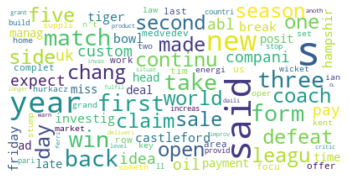

Cluster: 1


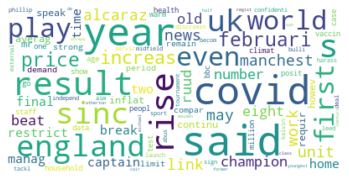

Cluster: 2


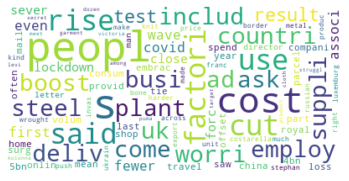

In [40]:
#visualising the clusters
import matplotlib.pyplot as plt
from wordcloud import WordCloud
result={'cluster':model.labels_,'data':data}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['data'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

# USING SCRAPPED NEWS FROM THE BBC SITE

we used the data provided from this link and we extracted only the 3 categoories
* https://www.kaggle.com/datasets/rmisra/news-category-dataset?resource=download

In [23]:
df = pd.read_csv("news_data.csv")
df.head()

,SPORTS,BUSINESS,SCIENCE
0,“I never want to put restrictions on the speec...,The investigation could lead to new U.S. tarif...,The researchers plan to scour the Loch Ness ne...
1,The pardoning of the black heavyweight boxer i...,The new policy was unveiled weeks after the co...,"The supposed ""interstellar immigrant"" is locat..."
2,The score is love-love.,"Following the council vote, Amazon’s vice pres...",It's the first time a rocket designed by a Chi...
3,"""I don’t think people should be staying in loc...",Victims will be free to go to court -- but a f...,YIKES!
4,Was it supposed to be Gary Busey or Mickey Roo...,The breach is believed to have occurred betwee...,Some of America's top researchers will move to...


In [29]:
news = []
for topic in df.columns:
    news.extend(list(df[topic].values.astype('U')))
print(f"we have {len(news)} news in total")

we have 6288 news in total


In [53]:
clean_news = []
for new in news:
    if new == "nan":
        continue
    clean_news.append(clean(new))


## Clusterning using data from kaggle 

In [54]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(clean_news)

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in (order_centroids[i, :20]):
        print(' %s' % terms[ind], end=' -')
    print()

print("\n")

Top terms per cluster:
Cluster 0:
 year - say - time - make - peopl - thing - way - want - old - work - know - mani - compani - busi - ve - like - need - scientist - world - right -
Cluster 1:
 new - york - studi - research - citi - suggest - compani - year - report - time - england - chang - way - look - univers - accord - busi - like - use - peopl -
Cluster 2:
 said - compani - like - game - team - look - world - olymp - day - space - use - player - american - chang - realli - come - research - think - work - sport -




In [62]:
print("Prediction")

Y = vectorizer.transform([clean("how to manage the time of a business man is what makes his company successful") ])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([clean("in new york city, new studies show that covid 19 is a dangerous disease, scientist say")])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([clean("he is a good player and a great shampion, his team helped him a lot")])
prediction = model.predict(Y)
print(prediction)

Prediction
[0]
[1]
[2]


Cluster: 0


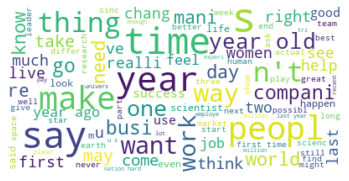

Cluster: 1


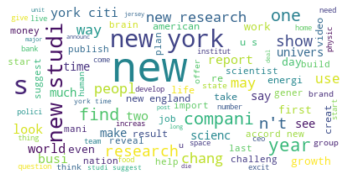

Cluster: 2


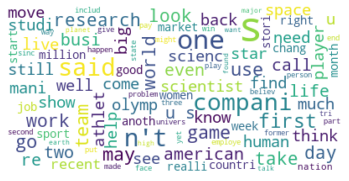

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
result={'cluster':model.labels_,'data':clean_news}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['data'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()